In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = 'USDJPY=X'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-06 00:00:00+00:00,132.623001,132.621994,129.834000,131.410004,0,0.0,0.0
2023-02-13 00:00:00+00:00,131.550995,135.080002,131.466003,134.110001,0,0.0,0.0
2023-02-20 00:00:00+00:00,134.307007,136.470001,133.929001,136.470001,0,0.0,0.0
2023-02-27 00:00:00+00:00,136.395004,137.065002,135.259995,135.839996,0,0.0,0.0
2023-03-06 00:00:00+00:00,135.869995,137.895996,134.171997,135.000000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-06 00:00:00+00:00,157.481003,158.856995,156.274002,157.690002,0,0.0,0.0
2025-01-13 00:00:00+00:00,157.886993,158.121994,154.983002,156.270004,0,0.0,0.0
2025-01-20 00:00:00+00:00,156.306000,156.746994,154.798004,155.979996,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-03 00:00:00+00:00,109.955002,109.978996,109.530998,109.697998,0,0.0,0.0
2020-02-10 00:00:00+00:00,109.628998,110.121002,109.611000,109.782997,0,0.0,0.0
2020-02-17 00:00:00+00:00,109.777000,112.185997,109.655998,111.550003,0,0.0,0.0
2020-02-24 00:00:00+00:00,111.555000,111.656998,107.778000,108.136002,0,0.0,0.0
2020-03-02 00:00:00+00:00,107.751999,108.557999,104.996002,105.309998,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-06 00:00:00+00:00,157.481003,158.856995,156.274002,157.690002,0,0.0,0.0
2025-01-13 00:00:00+00:00,157.886993,158.121994,154.983002,156.270004,0,0.0,0.0
2025-01-20 00:00:00+00:00,156.306000,156.746994,154.798004,155.979996,0,0.0,0.0


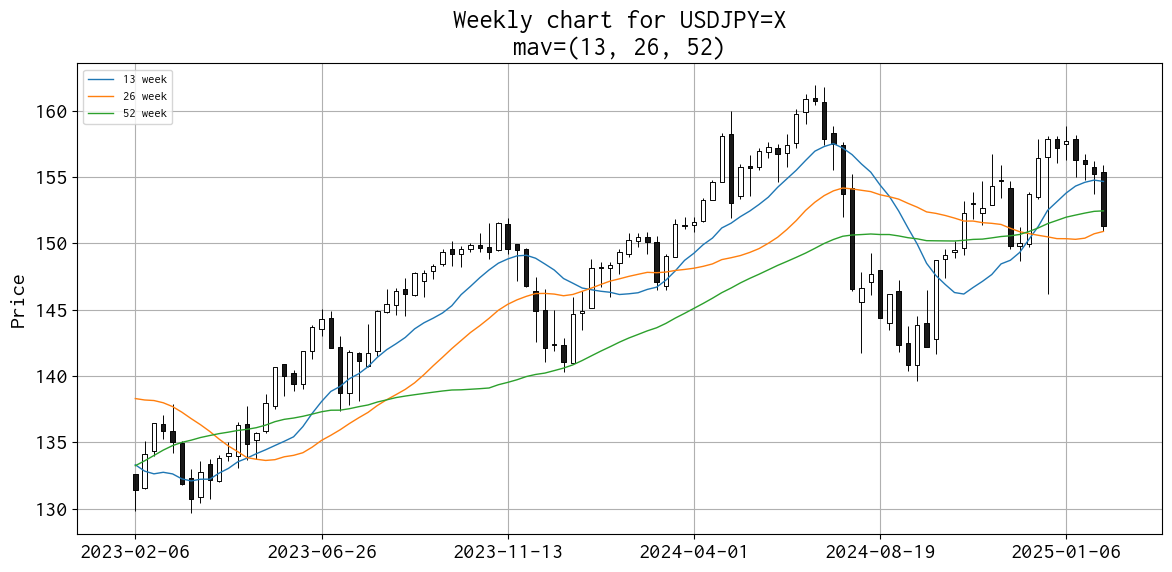

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ma13 = df0['Close'].rolling(13).mean()
ma26 = df0['Close'].rolling(26).mean()
ma52 = df0['Close'].rolling(52).mean()
apds  = [
    mpf.make_addplot(ma13[df.index], width=1, label='13 week', ax=ax),
    mpf.make_addplot(ma26[df.index], width=1, label='26 week', ax=ax),
    mpf.make_addplot(ma52[df.index], width=1, label='52 week', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%Y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s\nmav=(13, 26, 52)' % symbol)
ax.legend(loc='upper left', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_exchange.png')
plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-03 00:00:00+00:00,155.363007,155.863998,150.923996,151.292999,0,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-01-27 00:00:00+00:00    155.190002
2025-02-03 00:00:00+00:00    151.292999
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-01-27 00:00:00+00:00         NaN
2025-02-03 00:00:00+00:00   -3.897003
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(13).mean()

Date
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
2023-03-06 00:00:00+00:00           NaN
                                ...    
2025-01-06 00:00:00+00:00    153.783846
2025-01-13 00:00:00+00:00    154.303077
2025-01-20 00:00:00+00:00    154.587692
2025-01-27 00:00:00+00:00    154.755385
2025-02-03 00:00:00+00:00    154.651770
Name: Close, Length: 105, dtype: float64

In [8]:
df['Close'].rolling(26).mean()

Date
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
2023-03-06 00:00:00+00:00           NaN
                                ...    
2025-01-06 00:00:00+00:00    150.337692
2025-01-13 00:00:00+00:00    150.291154
2025-01-20 00:00:00+00:00    150.377693
2025-01-27 00:00:00+00:00    150.708846
2025-02-03 00:00:00+00:00    150.887077
Name: Close, Length: 105, dtype: float64

In [9]:
df['Close'].rolling(52).mean()

Date
2023-02-06 00:00:00+00:00           NaN
2023-02-13 00:00:00+00:00           NaN
2023-02-20 00:00:00+00:00           NaN
2023-02-27 00:00:00+00:00           NaN
2023-03-06 00:00:00+00:00           NaN
                                ...    
2025-01-06 00:00:00+00:00    151.961711
2025-01-13 00:00:00+00:00    152.118153
2025-01-20 00:00:00+00:00    152.268154
2025-01-27 00:00:00+00:00    152.399308
2025-02-03 00:00:00+00:00    152.437057
Name: Close, Length: 105, dtype: float64